In [25]:
import matplotlib.pyplot as plt

import cv2
cv2.ocl.setUseOpenCL(False)
import rasterio
from rasterio.plot import reshape_as_image
from rasterio.enums import Resampling

%matplotlib inline 

## Extracting raster images
Downloaded satelite images here https://www.kaggle.com/datasets/isaienkov/deforestation-in-ukraine

In [21]:
RASTER_PATH = {"rasters/T36UYA_20190626T083601_TCI.jp2": "train", "rasters/T36UYA_20190417T083601_TCI.jp2": "query"}

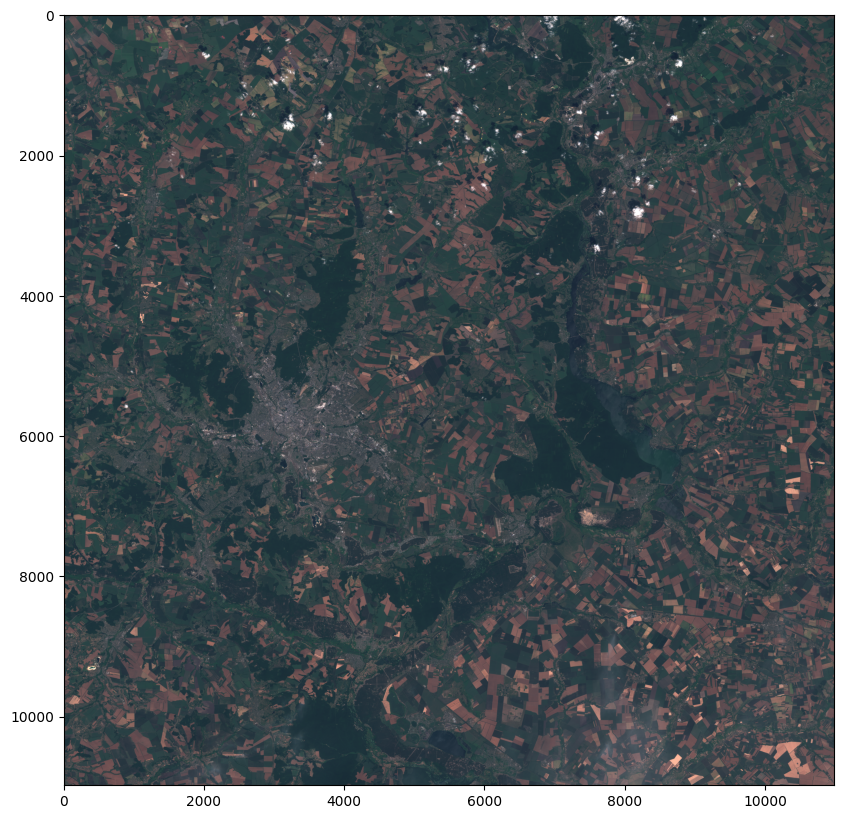

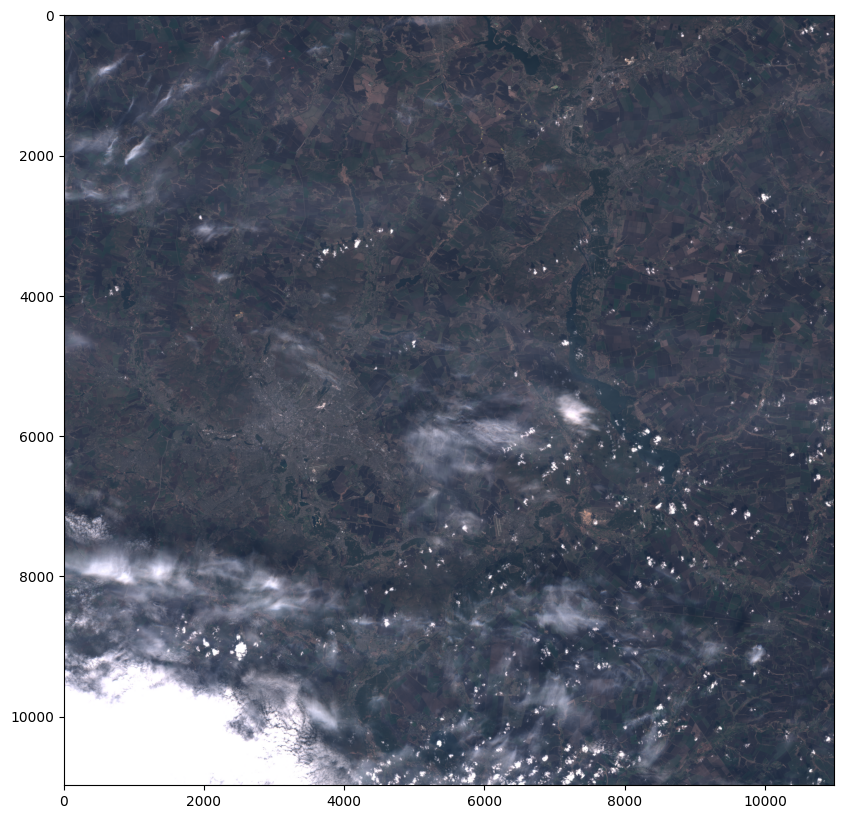

In [24]:
for raster in RASTER_PATH.keys():
    with rasterio.open(raster, "r", driver='JP2OpenJPEG') as src:
        raster_image = src.read()

    raster_img = reshape_as_image(raster_image)
    plt.figure(figsize=(10, 10))
    plt.imshow(raster_img)

## Converting raster images to jpg

In [55]:
for input_jp2_path, output_jpg_path in RASTER_PATH.values():
    with rasterio.open(input_jp2_path) as src:
        profile = src.profile
    
        profile["driver"] = "JPEG"
    
        profile["compress"] = "jpeg"
        profile["photometric"] = "YCbCr"
    
        # Resample the data if needed (optional)
        factor = 0.5  # You can adjust the resampling factor as needed
        new_height = int(src.height * factor)
        new_width = int(src.width * factor)
        data = src.read(
            out_shape=(src.count, new_height, new_width),
            resampling=Resampling.bilinear
        )
    
        # Write the data to the output JPEG file
        with rasterio.open(output_jpg_path, "w", **profile) as dst:
            dst.write(data)